In [1]:
import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
# LEER LOS DATOS 
file_in = pd.read_csv('41401_due_to_AHE.csv') #lee archivo 
file_in = file_in.drop(['subject_id', 'hadm_id', 'icustay_id'], axis= 'columns') #elimino las columnas que no ocupo 

# IMPUTACIÓN DE DATOS 
x = file_in.drop(['code_41401'], axis='columns') #para mis variables de entrada soalamente elimino la varaible a predecir
y= file_in.code_41401 #me quedo con la variable a predecir en y 
columnas= x.columns 


# DIVIDIR CONJUNTO DE ENTRENAMIENTO, VALIDACIÓN Y PRUEBA 
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, )
print('X_train:', x_train.shape, 'X_test:', x_test.shape) 

#imp = IterativeImputer(max_iter=40).fit(x_train) 
#imp = KNNImputer(n_neighbors=5, weights= 'uniform').fit(x_train)
imp= SimpleImputer(missing_values=np.nan, strategy='median').fit(x_train) #mean, most frequent, constant 

x_train = imp.transform(x_train)
x_test = imp.transform(x_test)
print('X_train:', x_train.shape, 'X_test:', x_test.shape)


X_train: (3563, 40) X_test: (1528, 40)
X_train: (3563, 40) X_test: (1528, 40)


In [3]:
print(type(x_train))
x_train_imputado = pd.DataFrame(x_train, columns=[columnas]) #convirtiendo el arreglo en dataframe 
x_test_imputado = pd.DataFrame(x_test, columns=[columnas])
x_test_imputado['age'].describe()

<class 'numpy.ndarray'>


,age
count,1528.000000
mean,67.395942
std,15.542355
min,17.000000
25%,58.000000
50%,70.000000
75%,79.000000
max,96.000000


In [4]:
# ESTANDARIZACIÓN DE DATOS 
scaler = StandardScaler().fit(x_train_imputado)
x_train_escalado = scaler.transform(x_train_imputado)
x_test_escalado = scaler.transform(x_test_imputado)

#COLOCAR PRINTS 
print('X_train:', x_train_escalado.shape, 'X_test:', x_test_escalado.shape)

X_train: (3563, 40) X_test: (1528, 40)


In [5]:
# DEFINIR MODELO A UTILIZAR 
modeloRF = RandomForestClassifier()

#DEFINIR PARÁMETROS A ITERAR

parametrosRF = {'n_estimators': range(10, 200, 10), 'criterion':['gini'], 'max_depth': range(1,10,1), 
              'max_features':['log2']} # PARA RF
parametros =  {'criterion': ['gini'], 'max_depth': [7], 'max_features': ['log2'], 'n_estimators': [170]}
#ENTRENAR GRID SEARCH 
balanced = class_weight.compute_sample_weight('balanced', y_train)
#RKF = RepeatedKFold(n_splits=5, n_repeats=2, random_state=422) #probar los CROSS VALIDATION
#SKF = StratifiedKFold(n_splits=5, shuffle= True, random_state=422)
RSKF = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)

grid = GridSearchCV(estimator= modeloRF, param_grid= parametros, cv=RSKF, scoring='roc_auc', verbose=2, refit= True)

In [6]:
grid.fit(x_train, y_train, sample_weight = balanced)

Fitting 100 folds for each of 1 candidates, totalling 100 fits
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.6s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.

[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=170; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_e

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'max_features': ['log2'], 'n_estimators': [170]},
             scoring='roc_auc', verbose=2)

In [7]:
# METRICAS DEL MODELO 
auc_train = grid.best_score_
std_train = grid.cv_results_['std_test_score'][grid.best_index_]
best_params = grid.best_params_
best_estimator = grid.best_estimator_

print("auc:",auc_train)
print("std_validation:",std_train)
print('best estimator:', best_estimator)
print('best parameters:',best_params)

auc: 0.8101629061396034
std_validation: 0.038341582798598485
best estimator: RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=170)
best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 170}


In [8]:
import shap
shap.initjs()

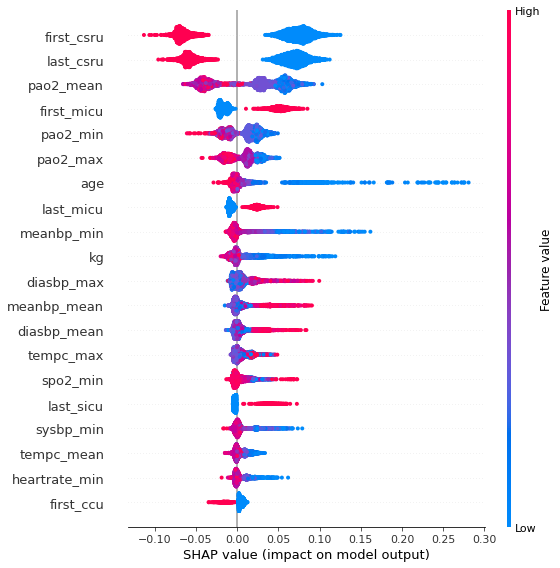

In [9]:
explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[0],x_train,
                    feature_names=x.columns,
                    plot_type="dot",
                    max_display=20)

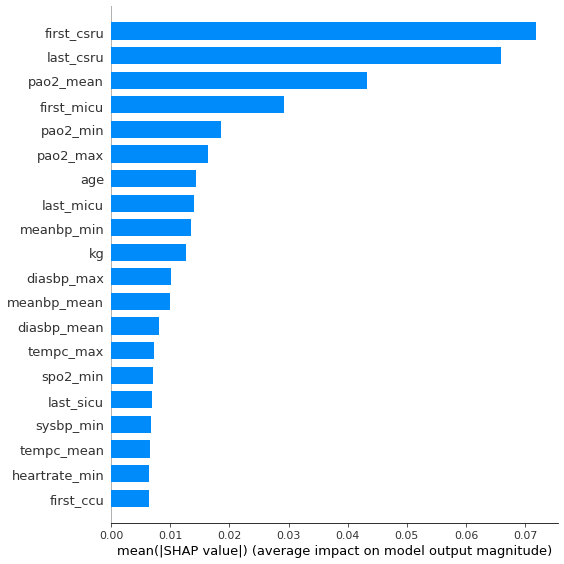

In [10]:
explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[0], x_train, feature_names=x.columns, plot_type="bar")

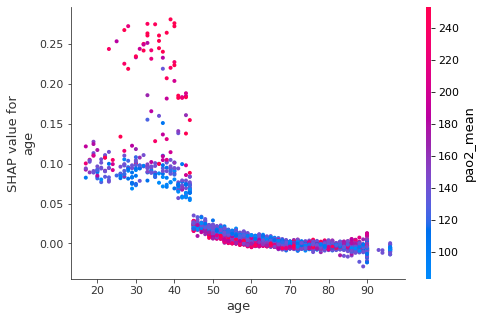

In [13]:
explainer = shap.TreeExplainer(grid.best_estimator_)

shap_values = explainer.shap_values(x_train)
    
feature_list=x.columns.tolist()

shap.dependence_plot(feature_list.index('age'), 
                         shap_values[0], x_train, 
                         interaction_index=feature_list.index('pao2_mean'),
                         feature_names=feature_list)

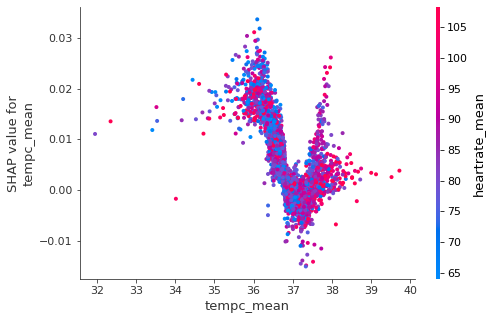

In [14]:
explainer = shap.TreeExplainer(grid.best_estimator_)

shap_values = explainer.shap_values(x_train)
    
feature_list=x.columns.tolist()

shap.dependence_plot(feature_list.index('tempc_mean'), 
                         shap_values[0], x_train, 
                         interaction_index=feature_list.index('heartrate_mean'),
                         feature_names=feature_list)